In [1]:
# Density-based Clustering locates regions of high density that are separated from one another by
# regions of low density.


In [2]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
# !conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

In [4]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
# %matplotlib inline to display plots
%matplotlib inline

In [5]:
#generate data points
# centroidLocation: Coordinates of the centroids that will generate the random data.
# Example: input: [[4,3], [2,-1], [-1,4]]
# numSamples: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)
# Example: 1500
# clusterDeviation: The standard deviation between the clusters. The larger the number, the further the spacing.
# Example: 0.5

def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [6]:
#Use createDataPoints with 3 inputs and store the output into variables X and y.
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [7]:
#Modeling
# DBSCAN works based on two parameters: Epsilon and Minimum Points
# Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
# minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 1, 1, 2])

In [8]:
#Distinguish outliers by replacing elements with "False" if they are.
#create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask


array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [10]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

In [12]:
#visualizing the data
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

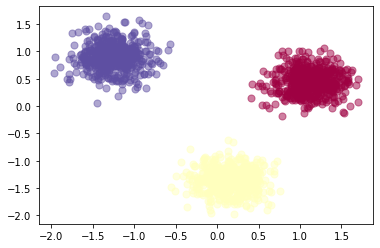

In [13]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

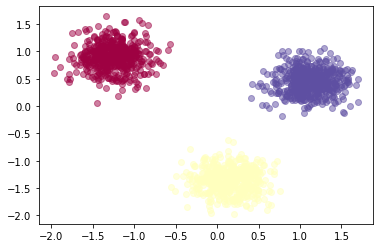

In [15]:
#partition the same dataset using K-means

from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  color=col, marker=u'o', alpha=0.5)
plt.show()
